<a href="https://colab.research.google.com/github/anibahs/TravelBookings_DataAnalysis/blob/main/GroupedBar_GrossValue_RegionXPlatform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd;
from matplotlib import pyplot as plt
import numpy as np;
%matplotlib inline

In [3]:
df = pd.read_excel("/content/Dataset.xlsx",names=["week","mobile_indicator_name","platform_type_name","super_region","country_name","booking_window_group",
         "property_country","net_gross_booking_value_usd","net_orders"])

In [7]:
entries_by_platform=df.groupby(["super_region","platform_type_name"],as_index=False).agg(gross_value = ('net_gross_booking_value_usd', 'sum'))


  super_region platform_type_name   gross_value
0         APAC            Desktop  6.911254e+07
1         APAC         Mobile App  3.294577e+07
2         APAC         Mobile Web  1.266633e+07
3         EMEA            Desktop  1.046738e+08
4         EMEA         Mobile App  1.097155e+07
5         EMEA         Mobile Web  2.380840e+07
6        LATAM            Desktop  2.652887e+07
7        LATAM         Mobile App  2.224027e+06
8        LATAM         Mobile Web  4.065610e+06


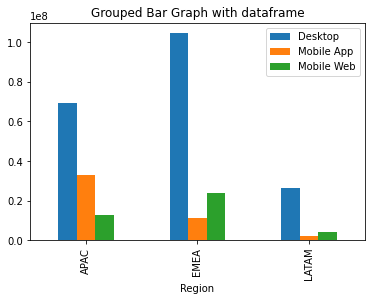

In [8]:
listofLists = []

for i in range(2,len(entries_by_platform),3):
    listofLists.append([entries_by_platform.loc[i-2, "super_region"],entries_by_platform.loc[i-2, 
              "gross_value"],entries_by_platform.loc[i-1, "gross_value"],entries_by_platform.loc[i, "gross_value"]])
    
    
df1=pd.DataFrame(listofLists, columns=['Region', 'Desktop', 'Mobile App', 'Mobile Web'])
print(entries_by_platform)
df1.plot(x='Region',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')